<a href="https://colab.research.google.com/github/Fiap-RJ/Fase-3---Cap-14/blob/main/ArthurAlentejo_RM564810_fase3_cap14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FIAP - Faculdade de Informática e Administração Paulista

<p align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Fiap-logo-novo.jpg" alt="FIAP - Faculdade de Informática e Admnistração Paulista" border="0" width=40% height=40%>
</p>

<br>

# Nome do projeto
### Análise Preditiva de Culturas Agrícolas

## Nome do grupo

## Integrantes:
- <a href="https://www.linkedin.com/in/arthur-alentejo">Arthur Guimarães Alentejo</a>
- <a href="https://www.linkedin.com/in/michaelrodriguess">Michael Rodrigues</a>
- <a href="https://www.linkedin.com/in/matheus-sacramento-de-lima-60512542/">Matheus Sacramento Lima</a>
- <a href="https://www.linkedin.com/company/inova-fusca">Nathalia Vasconcelos</a>


## 1. Introdução

Neste trabalho, será realizada uma análise exploratória e descritiva com base em um conjunto de dados que contém informações sobre condições climáticas e do solo (como temperatura, umidade, pH, nutrientes e precipitação) relacionadas com diferentes tipos de culturas agrícolas.

O objetivo principal é:

- Compreender o comportamento das variáveis presentes no conjunto de dados;
- Identificar padrões e perfis ideais para o plantio;
- Comparar o perfil ideal com três culturas distintas;
- Construir e comparar cinco modelos de machine learning que, com base nas características fornecidas, sejam capazes de prever a cultura mais adequada a ser cultivada.


## 2. Análise Exploratória e Análise Descritiva de Dados
Nesta seção, realizamos a **análise exploratória** e uma **análise descritiva** da base `Atividade_Cap_14_produtos_agricolas.csv` . O objetivo principal é entender melhor a estrutura do conjunto de dados, identificar possíveis problemas (como valores ausentes ou outliers), e obter **insights iniciais** sobre a relação entre os atributos climáticos/solo e os tipos de culturas agrícolas.

As etapas realizadas nesta seção incluem:

1. Verificação da estrutura da base: formato, tipos de dados e estatísticas iniciais.

2. Checagem de valores ausentes e inconsistências.

3. Distribuição individual das variáveis numéricas, para entender seu comportamento geral.

4. Análise de outliers e variações por tipo de cultura, usando boxplots.

5. Análise de correlação entre as variáveis contínuas.

6. Visualizações de dispersão (scatterplots) para verificar separabilidade entre classes.

7. Verificação do balanceamento das classes (culturas).

Essas análises servem como **base para decisões futuras**, principalmente para a construção dos modelos preditivos e para o entendimento do "perfil ideal" de solo/clima para as culturas, que será abordado posteriormente.

### 2.1 Informações gerais e Validação de dados

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Atividade_Cap_14_produtos_agricolas.csv")

print("Base carregada com sucesso!")
df.sample(5)


Base carregada com sucesso!


,N,P,K,temperature,humidity,ph,rainfall,label
952,23,5,44,21.207254,94.263047,7.163005,107.566080,pomegranate
154,94,54,17,23.391282,61.744272,5.871648,107.319813,maize
802,38,60,20,29.848231,60.638726,7.491217,46.804526,lentil
1945,110,39,25,22.606121,77.342640,7.208795,75.136172,cotton
1768,66,69,47,23.692122,93.610556,6.912300,87.533940,papaya


#### Verificando da estrutura da base: formato, tipos de dados e estatísticas iniciais.

In [6]:
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}\n")

df.info()
print("\n")


Número de linhas: 2200
Número de colunas: 8

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB




#### Estatísticas descritivas das variáveis numéricas

In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


#### Análise de valores ausentes e inconsistências

In [8]:
# Verificando valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

# Verificando se há valores duplicados
duplicados = df.duplicated().sum()
print(f"\nNúmero de linhas duplicadas: {duplicados}")

# Verificando valores fora de faixas esperadas (exemplo de checagem simples)
print("\nValores fora de faixas comuns:")
print("Temperatura negativa:", (df['temperature'] < 0).sum())
print("Umidade fora da faixa [0, 100]:", ((df['humidity'] < 0) | (df['humidity'] > 100)).sum())
print("Rainfall negativa:", (df['rainfall'] < 0).sum())


Valores ausentes por coluna:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Número de linhas duplicadas: 0

Valores fora de faixas comuns:
Temperatura negativa: 0
Umidade fora da faixa [0, 100]: 0
Rainfall negativa: 0


#### Checagem de valores ausentes e inconsistências

Nesta etapa, verificamos a integridade da base de dados em relação à presença de valores ausentes, duplicados e dados que fogem de faixas aceitáveis para variáveis ambientais.

**Achados principais:**

- **Não foram encontrados valores ausentes** em nenhuma das colunas da base.
- **Não há linhas duplicadas**, o que indica que cada registro representa uma condição única de solo/clima.
- Foram verificadas as seguintes faixas para inconsistências:
  - **Temperatura**: nenhuma temperatura negativa foi encontrada, o que é coerente com o uso agrícola.
  - **Umidade**: todos os valores estão entre 0 e 100%, como esperado.
  - **Precipitação (rainfall)**: não há valores negativos.

Com isso, concluímos que a base está **limpa e pronta para as análises exploratórias e estatísticas subsequentes**, sem necessidade de tratamentos adicionais neste momento.


### 2.2 Análise exploratória e descritiva
#### Distribuição das variáveis numéricas

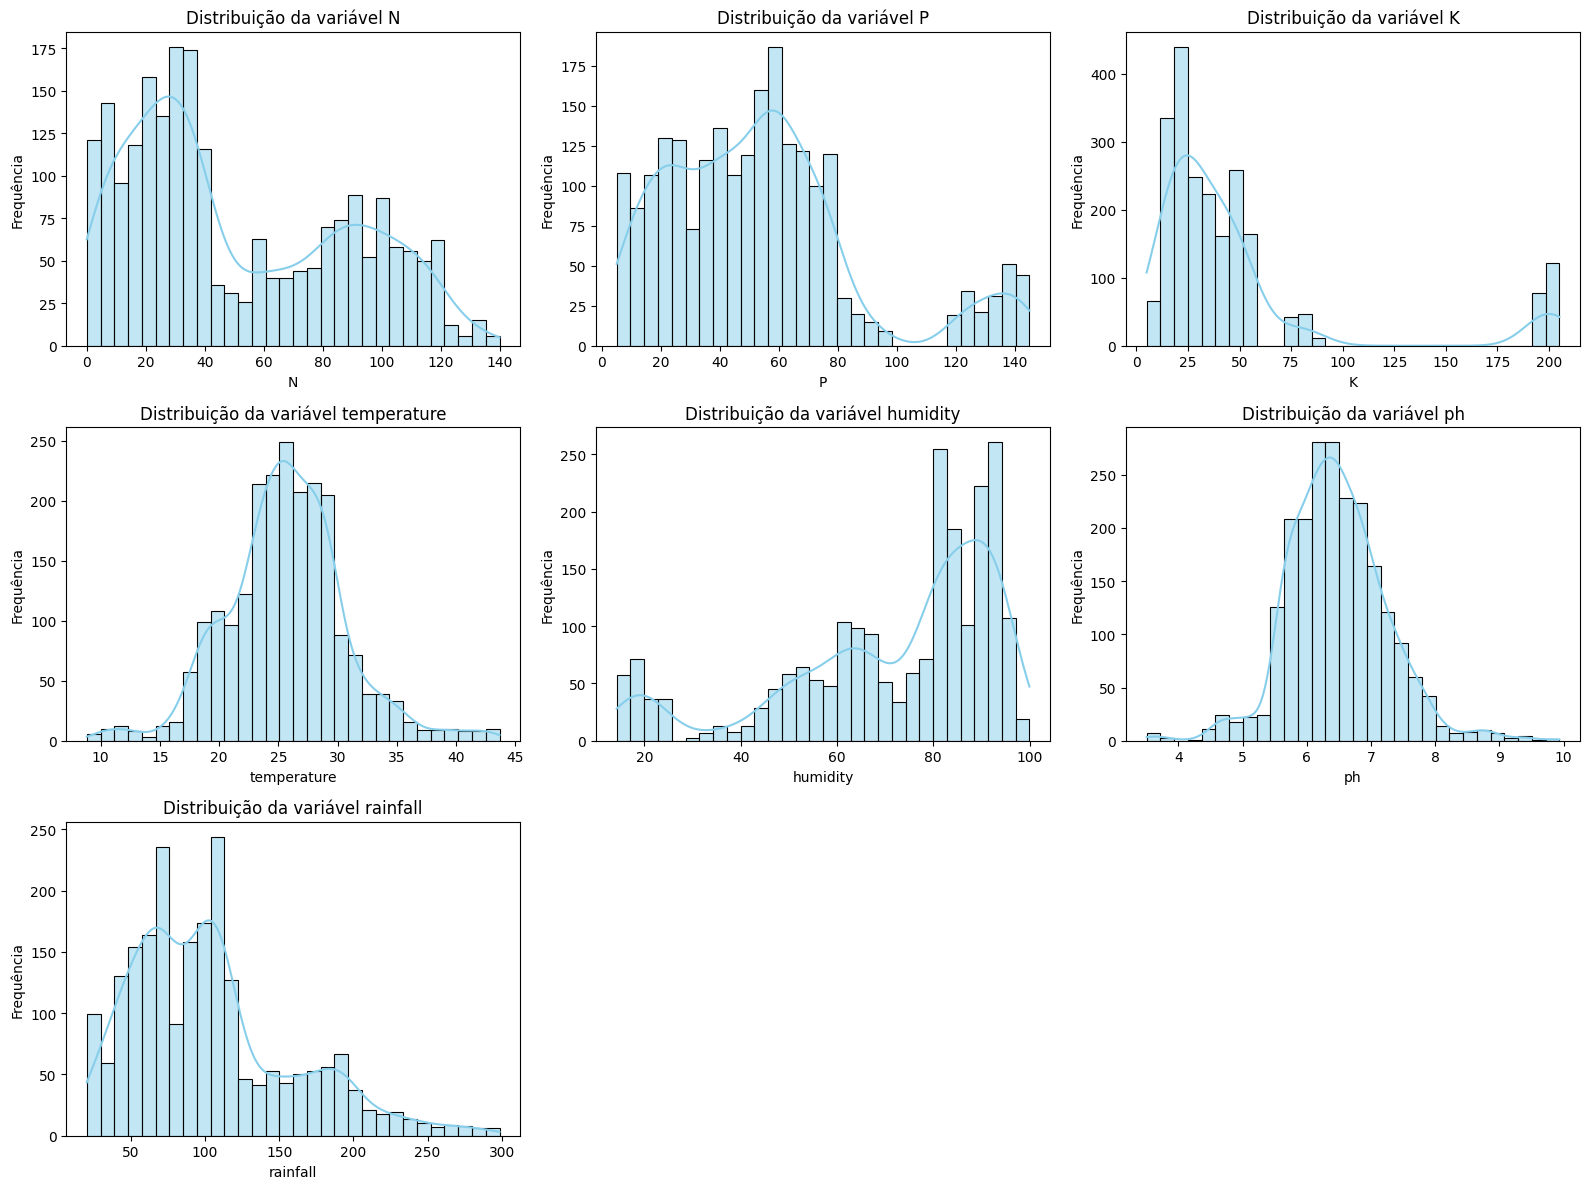

In [9]:
# Tamanho geral dos gráficos
plt.figure(figsize=(16, 12))

# Lista de colunas numéricas
colunas_numericas = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Criando histogramas
for i, coluna in enumerate(colunas_numericas, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[coluna], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribuição da variável {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


#### Análise de distribuição das Variáveis Numéricas

A análise da distribuição das variáveis numéricas permite entender o comportamento de cada atributo do solo e clima na base de dados.

**Principais observações:**

- **Nitrogênio (N)**
    - Apresenta uma distribuição bimodal, indicando dois grupos distintos de concentração de nitrogênio no solo. Pode sugerir que algumas culturas demandam níveis muito diferentes desse nutriente.
- **Fósforo (P)**
    - Distribuição assimétrica à direita (right-skewed), com a maioria dos solos tendo baixa concentração de fósforo e poucos com níveis elevados.
- **Potássio (K):**
    - Também assimétrica à direita, com uma alta concentração de registros em baixos níveis de potássio, e poucos registros com valores altos.
- **Temperatura:**
    - Distribuição aproximadamente normal, centrada entre 25°C e 27°C, o que sugere uma predominância de regiões tropicais ou subtropicais na base.
- **Umidade:**
    - Apresenta picos em faixas específicas, especialmente acima de 80%, indicando uma possível recorrência de determinadas condições climáticas mais úmidas nas regiões estudadas.
- **pH:**
    - Distribuição levemente simétrica, com a maior parte dos solos variando entre pH 5,5 e 7,5. Essa faixa é geralmente considerada ideal para muitas culturas agrícolas.
- **Precipitação (rainfall):**
    - A distribuição é assimétrica à direita, com muitos registros com precipitação entre 50 mm e 150 mm, e uma cauda que se estende para valores acima de 200 mm.

#### Outliers e Variações por Tipo de Cultura

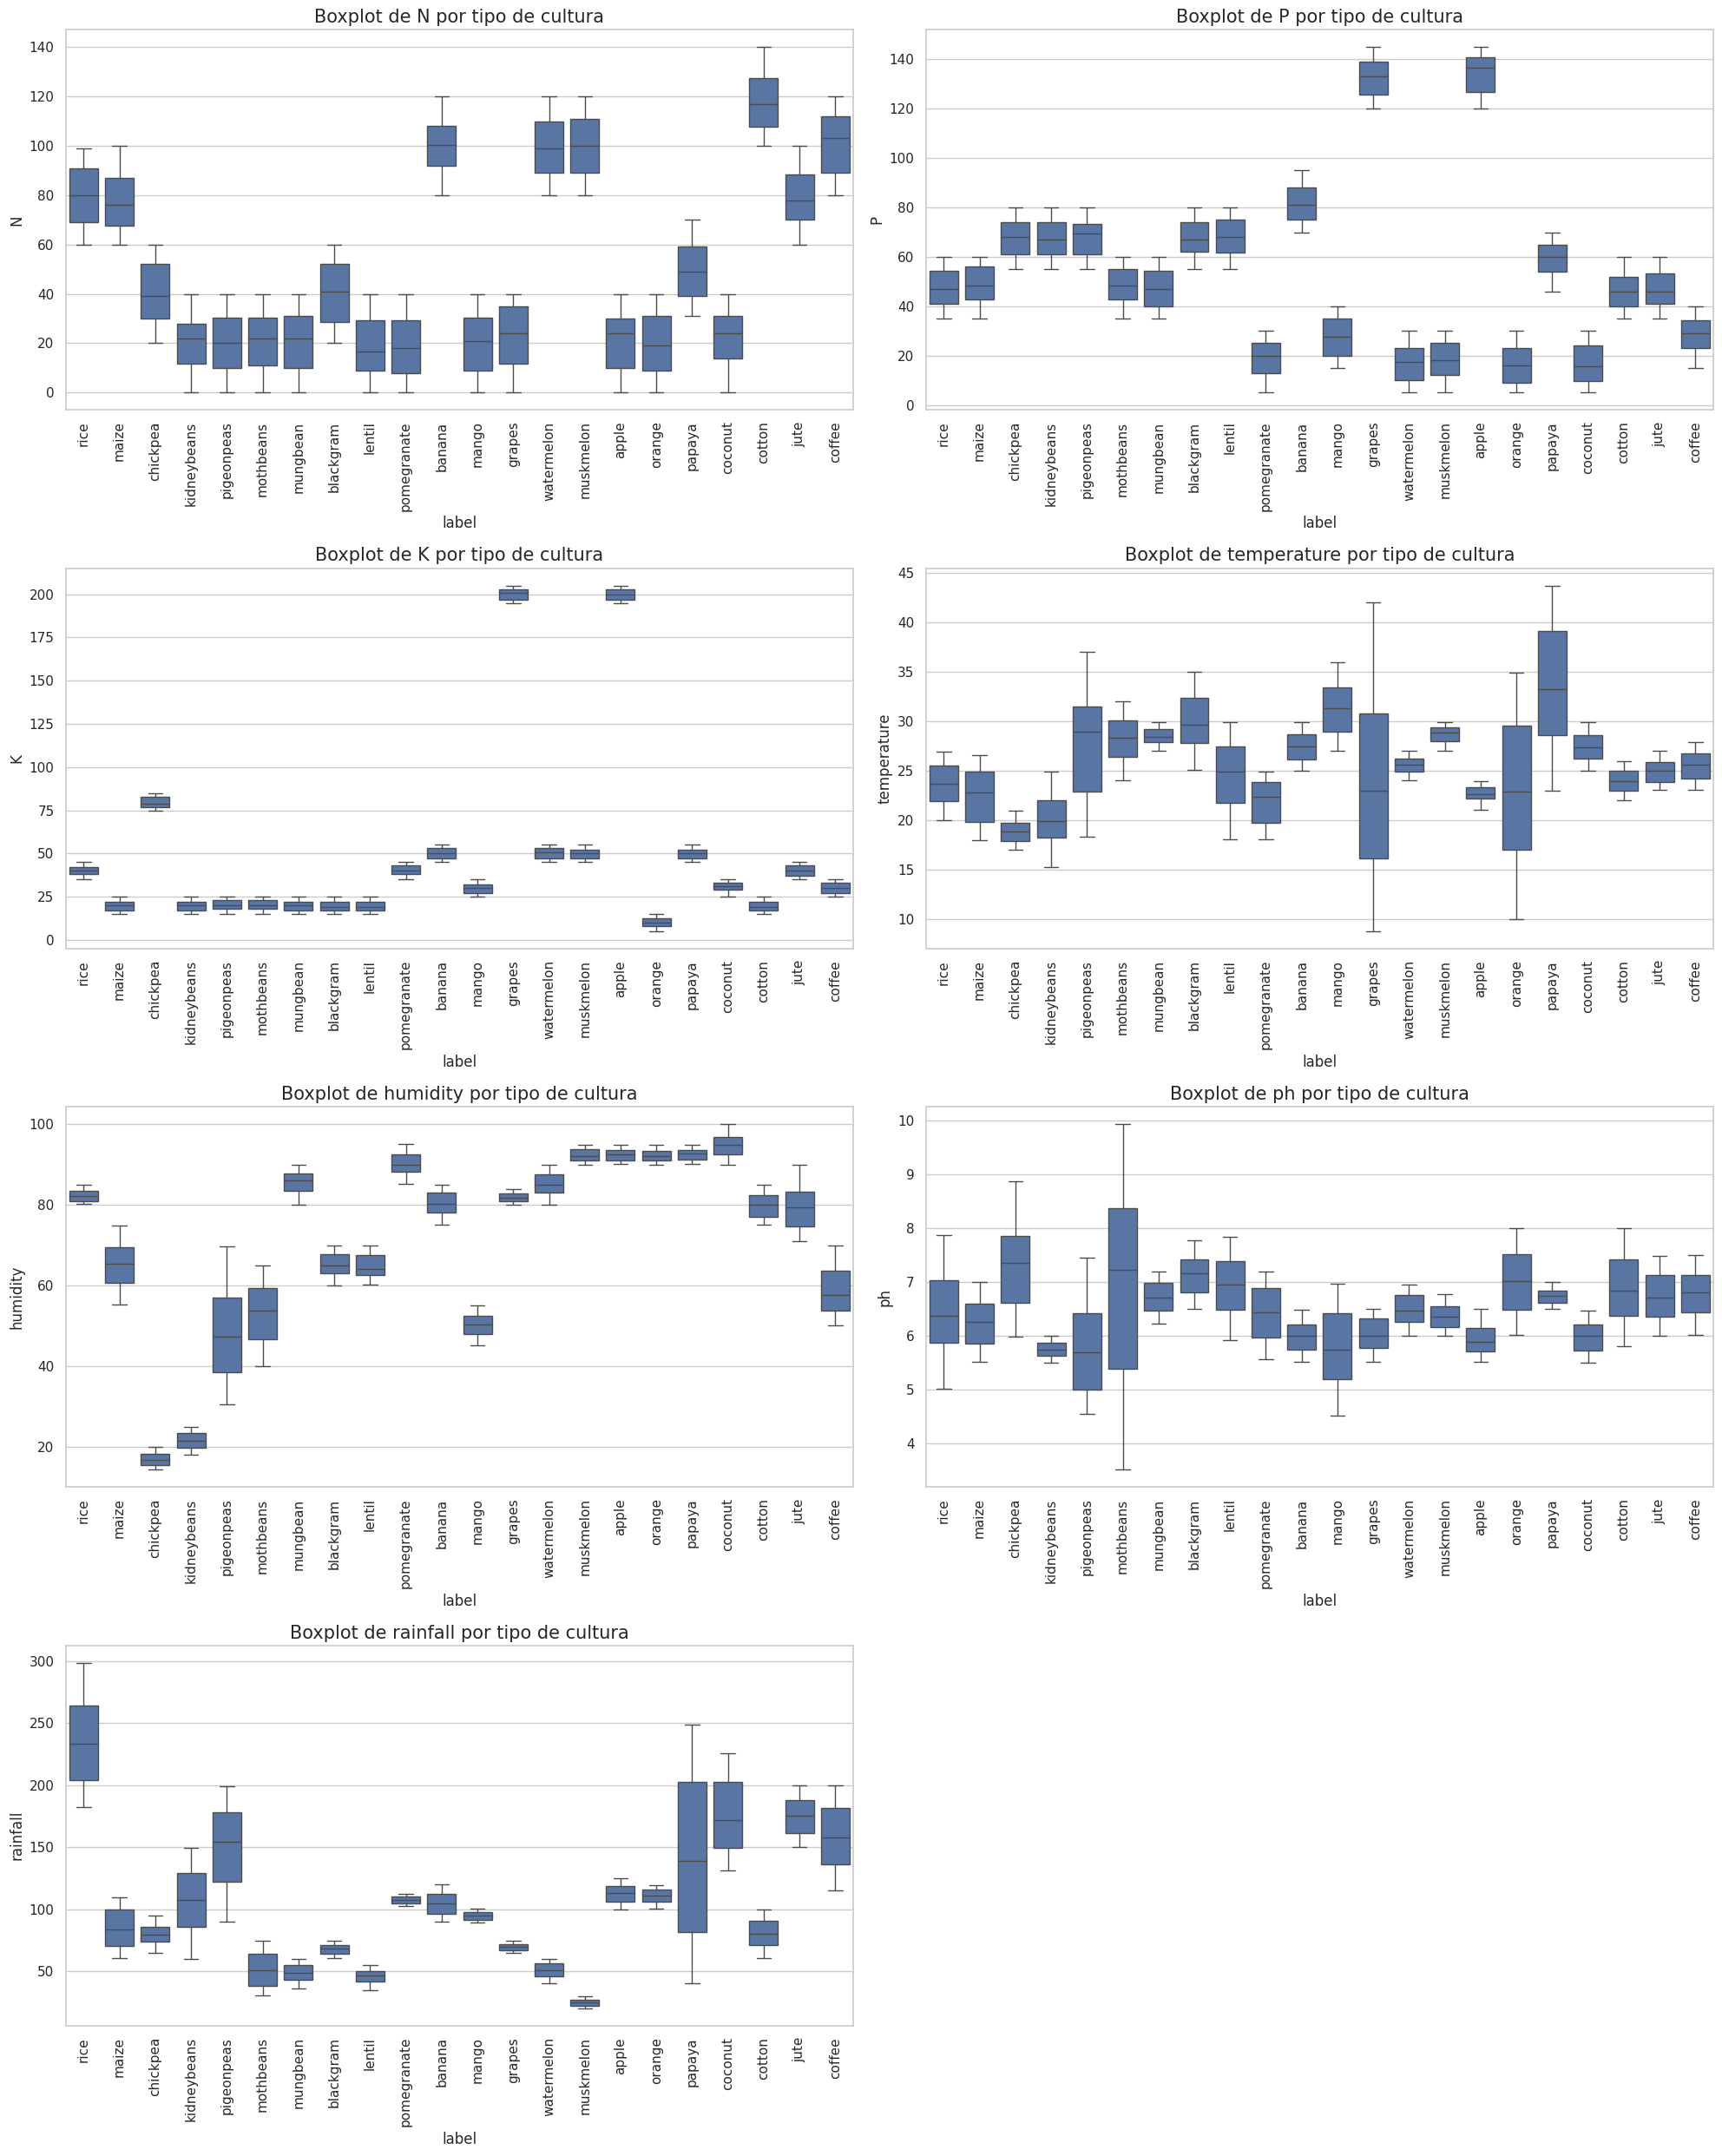

In [10]:
# Define o estilo dos gráficos
sns.set(style="whitegrid")

# Lista de variáveis numéricas
variaveis = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Criação dos boxplots
plt.figure(figsize=(20, 25))
for i, var in enumerate(variaveis, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=df, x='label', y=var)
    plt.title(f'Boxplot de {var} por tipo de cultura', fontsize=15)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


#### Análise de Outliers e Variações por Tipo de Cultura

A seguir, realizamos uma análise exploratória usando boxplots para cada uma das variáveis do dataset, segmentadas por tipo de cultura (`label`). Essa abordagem nos permite visualizar a distribuição dos dados, identificar a presença de outliers e comparar a variação entre diferentes culturas.

##### 1. Nutrientes do Solo

- **N (Nitrogênio)**: Culturas como **coffee**, **cotton** e **muskmelon** apresentam os maiores valores de N, com mediana superior a 100. Em contraste, culturas como **lentil**, **pomegranate** e **orange** têm valores significativamente mais baixos, com várias ocorrências próximas de zero.
- **P (Fósforo)**: As culturas **grapes** e **apple** se destacam por exigirem altas concentrações de fósforo, enquanto outras como **watermelon**, **orange** e **coconut** possuem valores bem menores.
- **K (Potássio)**: Há grande concentração, **grapes** e **apple** possuem os maiores valores de K, passando de 190. Já culturas como **orange**, **coconut** e **maize** apresentam valores muito baixos, com mediana abaixo de 20.

##### 2. Condições Climáticas

- **Temperature**: As culturas **mango** e **papaya** estão associadas a temperaturas mais elevadas, com medianas acima de 30°C. Já **chickpea** e **kidneybeans** têm temperaturas medianas bem mais baixas, em torno de 20°C.
- **Humidity**: Observa-se uma alta umidade para culturas como **apple**, **orange**, **papaya** e **coconut**, com valores próximos ou acima de 90%. Por outro lado, culturas como **chickpea** e **kidneybeans** se destacam por apresentarem umidade bem menor, com valores medianos abaixo de 30%.
- **Rainfall**: **rice**, **papaya** e **coconut** apresentam altos níveis de precipitação, com valores que ultrapassam os 200mm. Já culturas como **muskmelon**, **lentil** e **mothbeans** ocorrem em regiões com baixa precipitação, frequentemente abaixo de 50mm.

##### 3. pH do Solo

- A maioria das culturas se encontra em faixas de pH entre 5.5 e 7.5. No entanto, algumas como **pigeonpeas** e **mothbeans** apresentam uma dispersão maior, indicando sensibilidade ou tolerância a uma maior variação no pH.
- Outliers são visíveis em várias culturas, como **pigeonpeas**, **mungbean** e **chickpea**, sugerindo amostras cultivadas em solos fora da faixa ideal.

##### Conclusões

- Culturas com maiores variações nos nutrientes e nas condições ambientais podem demandar cuidados extras no manejo e análise preditiva.
- A presença de outliers em variáveis como N, K e rainfall em algumas culturas indica que o modelo pode precisar de técnicas robustas ou tratamento de dados para evitar viés.
- Boxplots ajudam a identificar rapidamente as características específicas de cada cultura, facilitando a personalização de estratégias de cultivo ou recomendação de culturas adequadas com base nas condições do solo e clima.


#### Correlação entre Variáveis Contínuas

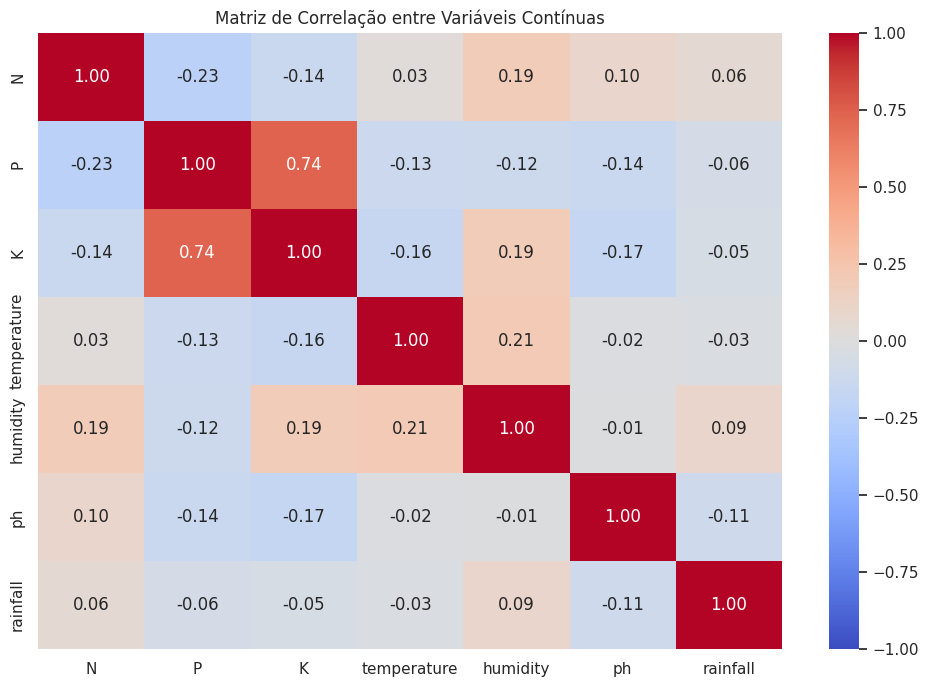

In [11]:
# Seleciona somente as colunas numéricas
df_numericas = df.select_dtypes(include=['float64', 'int64'])

# Calcula a matriz de correlação
matriz_correlacao = df_numericas.corr(method='pearson')

# Visualiza o heatmap da correlação

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlação entre Variáveis Contínuas")
plt.show()


####  Análise de Correlação entre Variáveis Contínuas

Nesta etapa, analisamos a correlação de Pearson entre as variáveis contínuas do dataset. A matriz de correlação gerada permite identificar relações lineares fortes ou fracas entre essas variáveis.

As principais observações são:

- Correlações próximas de **+1** indicam uma forte relação direta: quando uma variável aumenta, a outra tende a aumentar também.
- Correlações próximas de **-1** indicam uma forte relação inversa: quando uma variável aumenta, a outra tende a diminuir.
- Valores próximos de **0** sugerem fraca ou nenhuma relação linear.

Esse tipo de análise é útil para identificar colinearidade entre variáveis e orientar a seleção de atributos em etapas futuras, como modelagem preditiva.

> ⚠️ A correlação não implica causalidade — variáveis correlacionadas podem estar relacionadas a uma terceira variável não considerada.

#### Verificação do Balanceamento das Classes (Culturas)

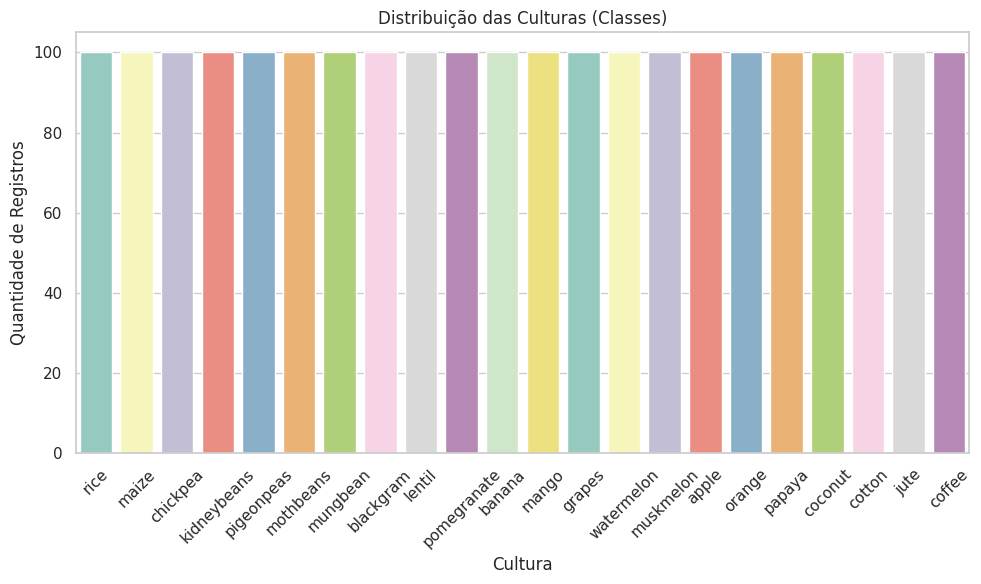

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


,proportion
label,
rice,4.55
maize,4.55
chickpea,4.55
kidneybeans,4.55
pigeonpeas,4.55
mothbeans,4.55
mungbean,4.55
blackgram,4.55
lentil,4.55


In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette='Set3', hue='label')
plt.title('Distribuição das Culturas (Classes)')
plt.xlabel('Cultura')
plt.ylabel('Quantidade de Registros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

distribuicao_classes = df['label'].value_counts()
percentuais = df['label'].value_counts(normalize=True) * 100
display(distribuicao_classes)
display(percentuais.round(2))


#### Análise do Balanceamento das Classes (Culturas)

Nesta etapa, analisamos a distribuição da variável alvo (`label`), que representa os diferentes tipos de culturas agrícolas presentes na base.

A análise revelou que a base está **perfeitamente balanceada**: todas as 22 classes (culturas) possuem exatamente **100 amostras**, o que representa **4,55% dos dados** para cada cultura.

Esse equilíbrio entre as classes é ideal para a tarefa de classificação, pois:

- Evita o viés dos modelos em relação a classes majoritárias;
- Permite a avaliação mais justa das métricas de performance para cada classe;
- Dispensa a necessidade de técnicas de balanceamento, como oversampling ou undersampling.

> Com um conjunto de dados balanceado, podemos focar na construção e avaliação dos modelos preditivos sem preocupações com distorções causadas por distribuição desigual entre as classes.


 ## 3. Comparação entre Perfil Ideal e Culturas Selecionadas
 ### 3.1 Comparação numérica entre o perfil ideal e três culturas selecionadas

In [13]:
# Perfil ideal (média geral)
perfil_ideal = df.describe().loc['mean']

# Médias por cultura
culturas_selecionadas = ['grapes', 'apple', 'papaya']
medias_culturas = df[df['label'].isin(culturas_selecionadas)].groupby('label').mean()

# Transpondo e juntando com o perfil ideal
comparacao = pd.concat(
    [perfil_ideal.rename('Ideal').to_frame(), medias_culturas.T],
    axis=1
)

# Reordenando colunas para ter o 'Ideal' primeiro
comparacao = comparacao[['Ideal'] + culturas_selecionadas]
comparacao

,Ideal,grapes,apple,papaya
N,50.551818,23.180000,20.800000,49.880000
P,53.362727,132.530000,134.220000,59.050000
K,48.149091,200.110000,199.890000,50.040000
temperature,25.616244,23.849575,22.630942,33.723859
humidity,71.481779,81.875228,92.333383,92.403388
ph,6.469480,6.025937,5.929663,6.741442
rainfall,103.463655,69.611829,112.654779,142.627839


#### Gráfico de Radar

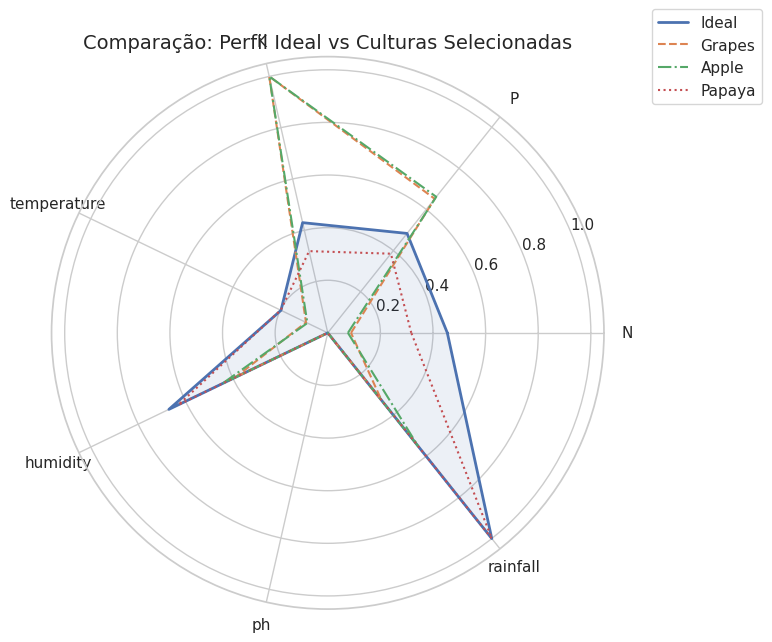

In [14]:
# Preparar os dados
labels = comparacao.index.tolist()
num_vars = len(labels)

# Normalização dos dados para visualização (entre 0 e 1)
def normalize(values):
    min_v = min(values)
    max_v = max(values)
    return [(v - min_v) / (max_v - min_v) if max_v != min_v else 0.5 for v in values]

# Normalizar os valores
ideal = normalize(comparacao['Ideal'].tolist())
grapes = normalize(comparacao.iloc[:, 1].tolist())
apple = normalize(comparacao.iloc[:, 2].tolist())
papaya = normalize(comparacao.iloc[:, 3].tolist())

# Fechar o gráfico
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
ideal += ideal[:1]
grapes += grapes[:1]
apple += apple[:1]
papaya += papaya[:1]
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, ideal, label='Ideal', linewidth=2)
ax.plot(angles, grapes, label='Grapes', linestyle='--')
ax.plot(angles, apple, label='Apple', linestyle='-.')
ax.plot(angles, papaya, label='Papaya', linestyle=':')

ax.fill(angles, ideal, alpha=0.1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title('Comparação: Perfil Ideal vs Culturas Selecionadas', size=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()


### 3.2 Análise Descritiva: Comparação entre Perfil Ideal e Culturas Selecionadas

Através do gráfico radar (Spider Chart), foi possível comparar visualmente o perfil médio ideal de cultivo com os perfis médios das culturas de **grapes**, **apple** e **papaya**, considerando as variáveis contínuas do solo e clima (N, P, K, temperatura, umidade, pH e precipitação).

**Observações principais:**

- **Grapes**:
  - Apresentam uma forte demanda por nutrientes **P** e **K**, significativamente acima da média ideal.
  - Possuem um padrão de **temperatura** e **pH** um pouco abaixo do ideal, indicando preferência por clima mais ameno e solo mais ácido.
  - A **precipitação** média também está próxima da média geral
  - O pH está próximo da neutralidade, um pouco abaixo da média,.
  - A umidade é alta, mas ligeiramente inferior à de **apple** e **papaya**.

- **Apple**:
  - Também apresentam altos valores para **P** e **K**, muito semelhantes aos da cultura de grapes.
  - Demandam temperaturas mais baixas que o perfil médio, o que é coerente com regiões de clima mais frio.
  - Possuem um padrão de **pH** um pouco abaixo do ideal, indicando preferência por solo mais ácido.

- **Papaya**:
  - Destaca-se por preferir ambientes mais **quentes**, com média de temperatura acima de todas as demais.
  - A **precipitação** é notavelmente maior, indicando preferência por regiões com alto volume de chuvas.
  - Também apresenta alta **umidade** e um pH um pouco mais alcalino que as outras culturas.
  - As exigências de **P** e **K** são menores em relação a grapes e apple, mas ainda próximas da média ideal.

**Conclusão**:
Cada cultura analisada possui características bastante específicas, e a comparação com o perfil ideal destaca claramente essas diferenças. Enquanto **grapes** e **apple** compartilham exigências nutricionais mais altas e climas mais amenos, **papaya** se diferencia por prosperar em condições mais quentes e úmidas. Essa análise reforça a importância de considerar o perfil edafoclimático ao escolher a cultura mais adequada para determinada região.


## 4. Modelos Preditivos

### 4.1 K-Nearest Neighbors (KNN)

#### Importando as bibliotecas

In [16]:
# Imports
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Separando e padronizando os dados

In [17]:
# Separando features e target
X = df.drop('label', axis=1)
y = df['label']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Padronização das variáveis
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Busca pelos melhores hiperparâmetros (GridSearchCV)

In [68]:
# Definindo o modelo base
knn = KNeighborsClassifier()

# Definindo a grade de hiperparâmetros
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # usado apenas se metric='minkowski'
}

# Criando o GridSearchCV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # ou outro score, como 'f1', 'roc_auc', etc.
    verbose=1,
    n_jobs=-1  # usa todos os núcleos disponíveis
)

# Treinando o GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Exibindo os melhores parâmetros e o melhor score
print("Melhores parâmetros encontrados:", grid_search.best_params_)
print("Melhor acurácia:", grid_search.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Melhores parâmetros encontrados: {'metric': 'manhattan', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Melhor acurácia: 0.98125


#### Criando e treinando o modelo com os hiperparâmetros encontrados

In [71]:
# Pegando os melhores parametros
best_params = grid_search.best_params_

# Criando e treinando o modelo KNN
knn = KNeighborsClassifier(
    n_neighbors=best_params['n_neighbors'],
    weights=best_params['weights'],
    metric=best_params['metric'],
    p=best_params['p']
)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', p=1, weights='distance')

#### Testando e avaliando o modelo

In [72]:
# Predições
y_pred = knn.predict(X_test_scaled)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Acurácia: 0.9818

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       0.95      1.00      0.98        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.95      0.95      0.95        20
       maize       1.00      0.95      0.97        20
       mango       0.95      1.00      0.98        20
   mothbeans       0.95      0.90      0.92        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      0.90      0

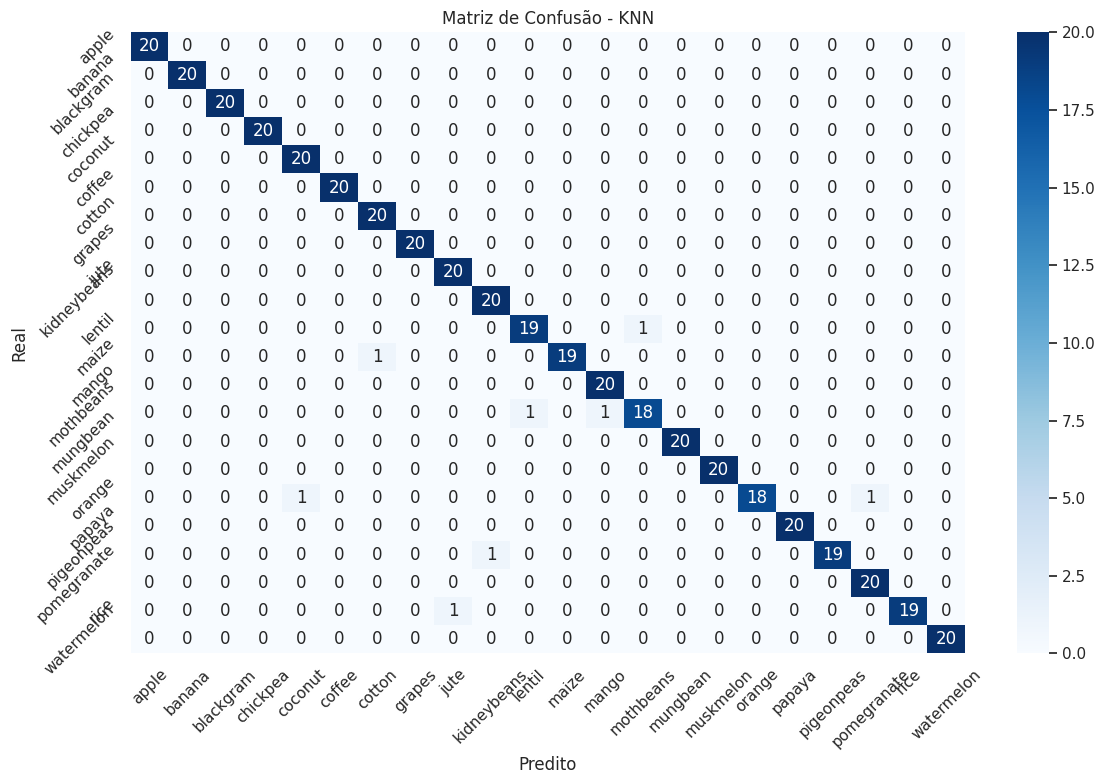

In [73]:
# Visualização da matriz de confusão
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title('Matriz de Confusão - KNN')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


#### Análise do Modelo Preditivo 1 – KNN (K-Nearest Neighbors)

Para o primeiro modelo preditivo, optamos por utilizar o algoritmo KNN (K-Nearest Neighbors), uma abordagem baseada em instâncias que classifica novas amostras com base na similaridade com seus vizinhos mais próximos no conjunto de dados.

##### **Escolha dos parâmetros**

O modelo foi configurado com os seguintes hiperparâmetros:

```python
KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    metric='manhattan',
    p=1
)
```

- `n_neighbors=5`: Define que o modelo considerará os 5 vizinhos mais próximos para realizar a classificação. Esse valor é um bom ponto de partida, pois oferece um equilíbrio entre robustez e complexidade.
- `weights='distance'`: Vizinhos mais próximos têm maior peso na decisão, o que é útil quando os dados não são linearmente separáveis ou possuem ruído.
- `metric='manhattan'` e `p=1`: Utiliza a distância de Manhattan (L1) como métrica de proximidade. Essa métrica pode ser mais eficaz em dados de alta dimensionalidade ou quando se deseja penalizar menos os grandes desvios em uma única dimensão.

##### **Resultados**

O modelo atingiu uma **acurácia de 0.9818**, o que indica um excelente desempenho geral.

##### **Conclusão**

O modelo KNN apresentou desempenho bastante satisfatório, com uma acurácia geral superior a 98%. Isso indica que ele é altamente eficaz na tarefa de prever a cultura agrícola mais adequada com base em características do solo e clima. A maioria das classes obteve valores de precisão, recall e f1-score próximos ou iguais a 1.00, o que mostra que o modelo está bem ajustado ao problema e os dados estão bem distribuídos.


### 4.2 Regressão Logística
#### Busca pelos melhores hiperparâmetros


In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Definindo o modelo base
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Definindo a grade de hiperparâmetros
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'saga']
}

# Criando o GridSearchCV
grid_logreg = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid_logreg,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Treinando a busca
grid_logreg.fit(X_train_scaled, y_train)

# Exibindo os melhores parâmetros
print("Melhores parâmetros - Regressão Logística:", grid_logreg.best_params_)
print("Melhor acurácia (validação cruzada):", grid_logreg.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Melhores parâmetros - Regressão Logística: {'C': 10, 'solver': 'newton-cg'}
Melhor acurácia (validação cruzada): 0.9784090909090908


### Criando e treinando o modelo com os hiperparâmetros encontrados

In [ ]:
# Pegando os melhores parametros
best_params_logreg = grid_logreg.best_params_


# Criando e treinando o modelo de Regressão Logística
logreg = LogisticRegression(
    solver=best_params_logreg['solver'],
    C=best_params_logreg['C'],
    max_iter=1000
)
logreg.fit(X_train_scaled, y_train)


#### Testando e avaliando o modelo

In [ ]:
# Avaliação do modelo
y_pred_logreg = logreg.predict(X_test_scaled)

print("Acurácia - Regressão Logística:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report - Regressão Logística:\n")
print(classification_report(y_test, y_pred_logreg))

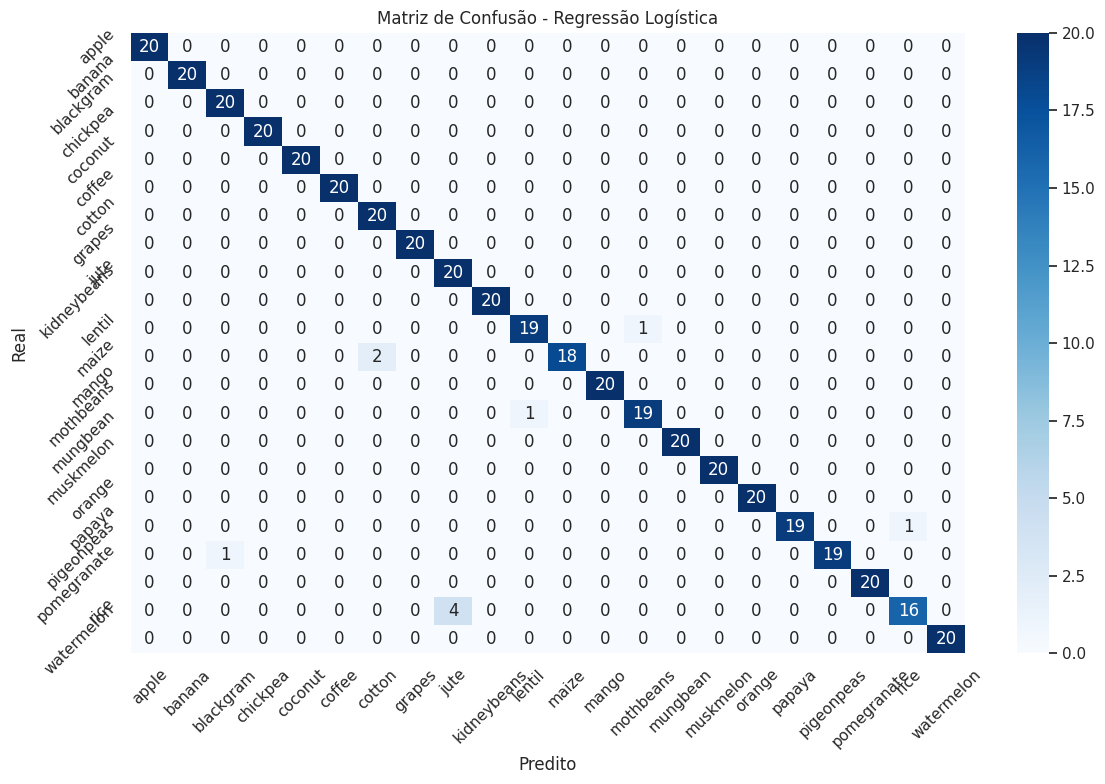

In [89]:
# Visualização da matriz de confusão para Regressão Logística
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

#### Análise do modelo preditivo 2: Regressão Logística

Nesta etapa, desenvolvemos um modelo de classificação utilizando o algoritmo de Regressão Logística. Para otimizar o desempenho do modelo, realizamos uma busca em grade (GridSearchCV) para encontrar os melhores hiperparâmetros.

##### Hiperparâmetros selecionados
Os melhores parâmetros encontrados foram:
- `C=10`: Esse parâmetro controla o grau de regularização. Quanto maior o valor de `C`, menor a regularização. Nesse caso, um valor alto indica que o modelo tende a se ajustar mais aos dados, buscando minimizar erros de treinamento.
- `solver='newton-cg'`: Um otimizador adequado para problemas com múltiplas classes e que suporta a opção `multinomial`.

##### Resultados
O modelo atingiu uma acurácia de **0.977**, demonstrando excelente desempenho na tarefa de classificação das culturas agrícolas com base nas variáveis climáticas e do solo. A análise mais detalhada por classe mostra que:

- A maioria das classes obteve **precision**, **recall** e **f1-score** iguais a **1.00**, indicando uma classificação perfeita.
- Algumas culturas como **rice**, **jute** e **cotton** apresentaram scores ligeiramente menores, o que pode indicar leve sobreposição de características com outras culturas.
- O macro e o weighted average para precision, recall e f1-score ficaram todos em torno de **0.98**, confirmando a robustez do modelo mesmo com múltiplas classes equilibradas.

##### Conclusão
A Regressão Logística, mesmo sendo um modelo linear, demonstrou ótima capacidade de generalização para este problema. Isso reforça que, em certos casos, modelos mais simples podem entregar excelente desempenho quando bem ajustados.


### 4.3 Support Vector Machine (SVM)

#### Busca pelos melhores hiperparâmetros

In [78]:
from sklearn.svm import SVC

# Modelo base
svm = SVC(random_state=42)

# Grade de hiperparâmetros
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Criando o GridSearchCV
grid_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid_svm,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Treinando a busca
grid_svm.fit(X_train_scaled, y_train)

# Resultados
print("Melhores parâmetros - SVM:", grid_svm.best_params_)
print("Melhor acurácia (validação cruzada):", grid_svm.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Melhores parâmetros - SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Melhor acurácia (validação cruzada): 0.9852272727272728


#### Criando e treinando o modelo com os hiperparâmetros encontrados

In [ ]:
# Pegando os melhores parametros
best_params_svm = grid_svm.best_params_

# Criando e treinando o modelo SVM
svm = SVC(
    kernel=best_params_svm['kernel'],
    C=best_params_svm['C'],
    gamma=best_params_svm['gamma'],
    decision_function_shape='ovr',
    random_state=42
)

svm.fit(X_train_scaled, y_train)

#### Testando e avaliando o modelo

In [ ]:
# Avaliação do modelo
y_pred_svm = svm.predict(X_test_scaled)

print("Acurácia - SVM:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report - SVM:\n")
print(classification_report(y_test, y_pred_svm))

In [3]:
# Visualização da matriz de confusão para SVM
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred_svm),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.title('Matriz de Confusão - SVM')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined